# MP3 - Aufgabenblatt 2: Die Fourieranalyse (am Beispiel von Dreiklängen)

Um dem Tagesziel, der Komprimierung eines Musikstückes, näher zu kommen, soll auf diesem Arbeitsblatt die Frequenzanalyse betrachtet werden. Auf dem ersten Blatt habt ihr bereits erlebt, was mathematisch gesehen ein Ton ist. Er wird bestimmt durch seine Lautstärke, die Amplitude der Schwingung und seine Höhe, die Frequenz der Schwingung. Beim mp3 Komprimierungsverfahren werden bestimmte Töne aus dem Original Song herausgeﬁltert, da sie auf Grund ihrer Eigenschaften (Frequenz oder Amplitude) nicht für das menschliche Gehör wahrnehmbar sind. Die Frage, welche auf diesem Blatt beantwortet werden soll ist, wie erhält man überhaupt aus einem Audiosignal die zugehörigen Frequenzen?

Auf diesem Übungsblatt werden wir daher eine Methode kennen lernen, die es ermöglicht, auch den Frequenzgehalt sehr komplexer Audiosignale zu bestimmen und zu analysieren: die Fouriereanalyse. Auch der von mp3 genutzte Algorithmus verwendet die Fourieranalyse,.

Die Fourieranalyse ist benannt nach dem französischen Mathematiker Joseph Fourier (1768 - 1830), dessen Arbeit die moderne Physik und Technik bis heute beeinflusst. Hier ist ein Bild von ihm: 
![Joseph Fourier](../MP3_Bilder/joseph.jpg)
*Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).*

In [35]:
# Hier nichts ändern
include("./code/MP3Tests.jl")

Main.MP3

## Aufgabe 1
**Überlagerung von Tönen**

Um die grundlegende Idee der Fourieranalysis zu verstehen, betrachten wir Dreiklänge. Diese Audiosignale sind komplexer als Töne, aber weniger komplex als gängige Musik. Sie sind - wie der Name vermuten lässt - die Summe dreier bestimmter Töne und können daher mathematisch durch die Addition dreier geeigneter Sinusschwingungen modelliert werden. Hier ist ein Beispiel für einen Dreiklang, der die Frequenzen 440, 554 und 659 Hz enthält:
$$g(t) = \sin(440 \cdot 2\pi \cdot t )+\sin(554 \cdot 2\pi \cdot t )+\sin(659 \cdot 2\pi \cdot t ).$$
                                                                                                                
Ziel ist es, im Folgenden einen eigenen Dreiklang zu erstellen sowie die Frequenzen fremder Dreiklänge mit Hilfe der Fourieranalyse zu bestimmen.

**Einen eigenen Dreiklang erstellen**
![Tontab.jpg](../MP3_Bilder/Tontab.jpg)
Obige Tabelle zeigt, welche Töne zu einem wohlklingenden Dreiklang zusammengefasst werden können (rechte Seite) sowie die Frequenzen dieser Töne (linke Seite). Anhand der Tabelle sieht man leicht, dass der obige Dreiklang $g$ aus den Tönen a, cis und e zusammengesetzt ist. Es handelt sich also um ein A. Ihr sollt nun mithilfe der Tabelle euren eigenen Dreiklang erstellen. Gebt dazu zunächste eure Gruppennummer an und erstellt anschließend euren eigenen Dreiklang, indem ihr ihn als Summe von drei geeigneten Sinusschwingungen implementiert.

*Ersetzt im folgenden Code `NaN` durch eure Gruppennummer bzw. durch einen Funktionsterm in $t$, sodass $g(t)$ einen Dreiklang aus obiger Tabelle beschreibt. Drückt anschließend auf "Run", damit euer Dreiklang graphisch angezeigt und abgespielt wird. Außerdem wird euer Dreiklang im Ordner Aufgabenblatt 2 als Datei gespeichert. Kopiert diese Datei in die Dropbox in den Ordner `Dreiklänge`.* 

Your browser does not support the audio element.

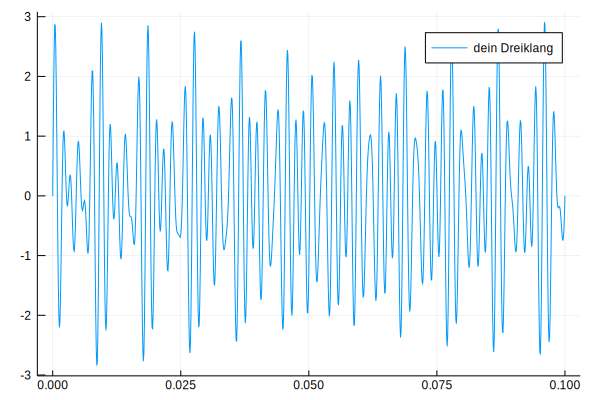

In [36]:
# Hier benötigen wir den Server
Gruppennummer = NaN; # Ersetze 'NaN' durch deine Gruppennummer
g(t) = sin(440*2*pi*t)+sin(554*2*pi*t)+sin(659*2*pi*t); # Ersetze 'NaN' durch deinen Dreiklang. Benutze dazu die obige Tabelle.

# Ab hier nichts mehr ändern
MP3.AB2A1Play(g)
MP3.AB2Aufgabe1(g)

## Aufgabe 2a)
**Frequenzen eines fremden Dreiklangs finden**

Die Fourieranalyse kann - wie bereits erwähnt - genutzt werden, um die in einem Audiosignal enthaltenden Frequenzen zu ermitteln. Dabei wird die Tatsache ausgenutzt, dass man beliebige Geräusche zumindest nährungsweise als (endliche) Summe von Sinusschwingungen verschiedener Frequenzen darstellen kann.  Die Fourieranalyse "zerlegt" ein Audiosignal in seine einzelnen Sinusschwingungen und bestimmt die Frequenzen und Amplituden dieser Schwingungen. Auf diese Weise kann festgestellt werden, welche Frequenzen zu welchem Anteil in einem Signal enthalten sind.
![Zerlegung.png](../MP3_Bilder/fouri.jpg)                     
Obige Abbildung soll das Prinzip hinter der Fourieranalyse verdeutlichen: Teil a) zeigt das auditive Ausgangssignal. Teil b) zeigt die Zerlegung dieses Signals in Sinusschwingungen. Es ist gut zu erkennen, dass das Audiosignal die Summe von 4 Sinusschwingungen (rot, grün, blau, türkis) mit unterschiedlichen Frequenzen und Amplituden ist. Trägt man die Amplitude jedes Teiltons gegen seine Frequenz auf, erhält man den in c) abgebildeten Graphen. Einen solchen Graphen nennt man **Frequenzspektrum**. An diesem kann abgelesen werden, welche Frequenzen zu welchem Anteil in einem Signal enthalten sind. Insgesamt ermöglicht die Fourieranalyse also einen Wechsel vom Zeitraum (a) in den Frequenzraum (c).

**Vorbereitungen**

Sobald sich die Dreiklänge der anderen Gruppen ebenfalls im Ordner `Dreiklaenge` befinden, kopiert ihr euch den Ordner `Dreiklaenge` in den Order `Arbeitsblatt 2` auf euren Desktop. Ihr sollt nun Schritt für Schritt die Frequenzen bestimmen, die im Dreiklang einer anderen Gruppe enthalten sind. Zunächst sehen und hören wir uns die Dreiklänge nur an.

*Ersetzt im folgenden Code `NaN` durch die Nummer der Gruppe, deren Dreiklang ihr analysieren wollt. Klickt anschließend auf den "Run" Button, um den Dreiklang abzuspielen und dessen Graph zu zeichnen.* 

In [37]:
# Hier benötigen wir den Server
Fremde_Gruppennummer = NaN; # Ersetzt 'NaN' durch die Gruppennummer der Gruppe, dessen Dreiklang ihr analysieren wollt

## Aufgabe 2b)
Nun gehen wir in die genauere Analyse. Versucht dazu, die Dreiklänge von (mindestens) drei Gruppen zu bestimmen. 

*Ersetzt im folgenden Code `NaN` durch die Nummer einer Gruppe, deren Dreiklang ihr analysieren wollt. Klickt anschließend auf "Run". Die erscheinende Abbildung zeigt das Frequenzspektrum des Dreicklangs der von euch ausgewählten Gruppe. An diesem könnt ihr die Frequenzen (x-Werte der Peaks) und Amplituden (Höhe der Peaks) der drei Ausgangstöne ablesen.*

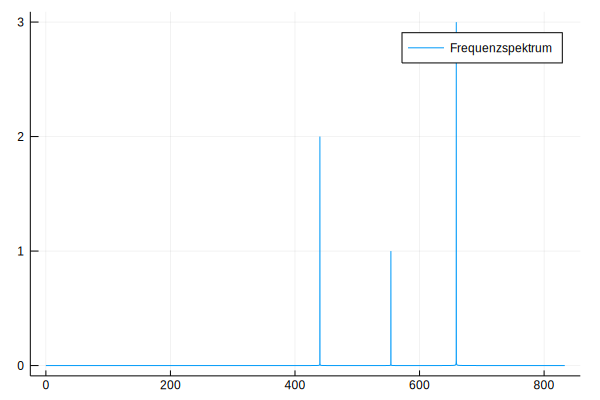

In [38]:
# Hier benötigen wir den Server
Fremde_Gruppennummer = NaN; # Ersetzt 'NaN' durch die Gruppennummer der Gruppe, deren Dreiklang ihr analysieren wollt
g(t) = 2*sin(440*2*pi*t)+sin(554*2*pi*t)+3*sin(659*2*pi*t);# Nur zum Testen, bis eine Serverlösung existiert

# Ab hier nichts mehr ändern
MP3.AB2Aufgabe2b1(g)

Da die genauen Frequenzen der drei Peaks nicht leicht abzulesen sind, könnt ihr euch diese mit dem folgenden Code ausgeben lassen.

*Drückt "Run". Es erscheinen die drei Frequenzen der obigen Peaks. Die Höhe der Peaks bestimmt die Reihenfolge: Zuerste die Frequenz mit dem höchsten Peak, dann die Frequenz mit dem zweithöchsten Peak, zum Schluss die Frequenz mit dem kleinsten Peak. Durch Ungenauigkeiten bei der numerischen Berechnung werden die Frequenzen ggf. leicht von denen in obiger Tabelle abweichen. Rundet die Frequenzen und tragt diese zusammen mit der Gruppennummer in dem zugehörigen Arbeitsblatt ein. Bestimmt außerdem mithilfe der obigen Tabelle, um welche Töne und welchen resultierenden Dreiklang es sich handelt.*

In [39]:
# Hier nichts ändern
MP3.AB2Aufgabe2b2(g)

Frequenz 1 = 658.9975094576362     Frequenz 2 = 439.99833711890733     Frequenz 3 = 553.9979062815333

**Wiederholt dieses Vorgehen, bis ihr die Dreiklänge von mindestens drei Gruppen analysiert habt.**

## Aufgabe 3)
Wählt nun eine der Gruppen, deren Dreiklang ihr analysiert habt, aus, um euer Ergebnis zu überprüfen. Dazu wollen wir zuächst die Sinusschwingungen der drei einzelnen Töne, die den Dreiklang bilden, betrachten und anschließend deren Summe. Wenn ihr alles richtig gemacht habt, entspricht diese Summe dem Originalton der entsprechenden Gruppe.

*Ersetzt im folgenden Code das erste `NaN` durch die Nummer der Gruppe, deren Dreiklang ihr analysieren wollt. Ersetzt die folgenden drei `NaNs` durch Terme, welche die im Dreiklang enthaltenen Sinusschwingungen beschreiben. Achtet dabei nicht nur auf die Frequenzen, sondern auch auf die Amplituden (Höhe der Peaks im Spektrogramm). Die Reihenfolge der Töne spielt hierbei keine Rolle. Danach ersetzt ihr das letzte `NaN` durch einen Term, der den zu den drei einzelnen Sinusschwinugungen gehörenden Dreiklang beschreibt. Klickt anschließend auf "Run". Daraufhin werden die drei von euch implementierten einzelnen Sinusschwingungen nacheinander abgespielt (erst $y1$, dann $y2$, dann $y3$) und graphisch dargestellt ($y1$ in Blau, $y2$ in Orange, $y3$ in Grün).*

Your browser does not support the audio element.

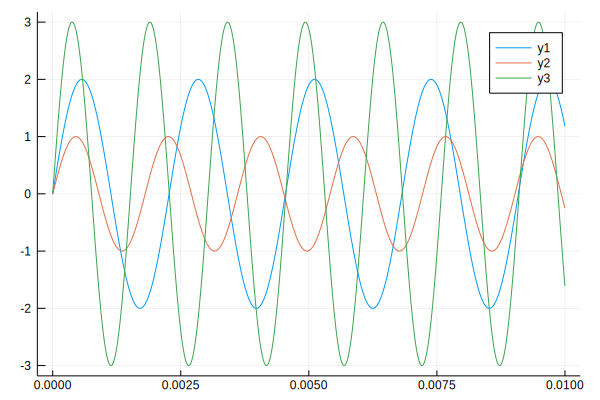

In [40]:
# Hier benötigen wir den Server
Fremde_Gruppennummer = NaN; # Ersetzt 'NaN' durch die Nummer der Gruppe, deren Dreiklang ihr analysiert habt

y1(t) = 2*sin(440*2*pi*t); # Ersetzt 'NaN' durch einen Term, der den ersten Teilton beschreibt
y2(t) = sin(554*2*pi*t); # Ersetzt 'NaN' durch einen Term, der den zweiten Teilton beschreibt
y3(t) = 3*sin(659*2*pi*t); # Ersetzt 'NaN' durch einen Term, der den dritten Teilton beschreibt

S(t) = 2*sin(440*2*pi*t)+sin(554*2*pi*t)+3*sin(659*2*pi*t); # Ersetzt 'NaN' durch einen Term, sodass S(t) der Summe der obigen drei Sinusschwingungen entspricht

# Ab hier nichts mehr ändern
MP3.AB2A31Play(y1,y2,y3)
MP3.AB2Aufgabe31(y1,y2,y3)

Nun testen wir zu guter Letzt, ob ihr den Dreiklang der Gruppe richtig erkannt habt.

*Drückt "Run". Der original Dreiklang der von euch gewählten Gruppe wird daraufhin dargestellt und abgespielt.
Vergleicht den Graphen mit obigem Graphen. Habt ihr die im Dreiklang enthaltenen Frequenzen richtig erkannt? Dann stimmen die zwei Graphen überein. Falls nicht, wiederholt eure Analyse in Aufgabe 2.*

**Wichtig: Im Spektrogramm kann man nur die Verhältnisse der Amplituden der drei Einzeltöne ablesen, nicht aber deren Absolutwerte. Daher kann es sein, dass euer Graph vom Graphen des original Dreiklangs abweicht, obwohl ihr alles richtig gemacht habt. Ihr erkennt diese Situation daran, dass euer Graph zwar die gleiche Form hat, wie der original Graph, aber eine andere Skalierung (y-Achsenbeschriftung). In diesem Fall habt ihr alles richtig gemacht und könnt fortfahren.**

In [41]:
# Hier benötigen wir den Server

## Zusatzaufgabe | Fourieranalyse per Hand
Wenn ihr mit allen Aufgaben fertig seit, könnt ihr jetzt die Zusatzaufgabe zu Aufgabenblatt 2 machen. 

*Im Folgenden wollen wir die Fourieranalyse einmal per Hand durchführen. Ließ dir dazu folgenden Infotext aufmerksam durch:*

Die Fourieranalyse zerlegt ein Signal in seine einzelne Sinus- und Cosinusfunktionen. Mathematisch gesehen ist das Ergebnis einer solchen Zerlegung eine unendliche Reihe, die sogenannte FourierReihe mit folgender Gestalt:

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} (a_n \cdot \cos(n\cdot\omega_0\cdot t) + b_n \cdot\sin(n\cdot \omega_0\cdot t))$$
Das Summenzeichen $\sum_{n=1}^{\infty}$ summiert  dabei die einzelnen Einträge von $(a_n \cdot \cos(n\cdot\omega_0\cdot t) + b_n \sin(n\cdot \omega_0\cdot t))$ auf. Weiter ist $\omega_0 = \frac{2\pi}{T}$, wobei $T$ die Periode der zu zerlegenden Funktion angibt, also die Länge bis sich die Funktion wiederholt. Die Koeffizienten $a_0, a_n$ und $b_n$ lassen sich wie folgt berechnen:

$$a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t)dt~,~~ a_n = \frac{1}{\pi} \int_{-\pi}^{\pi}f(t)\cos(nt)dt~,~~ b_n=\frac{1}{\pi} \int_{-\pi}^{\pi}f(t)sin(nt)dt$$
Ist die zu untersuchende Funktion **achsensymetrisch**, sind alle Koeffizienten $b_n = 0$. Ist die Funktion **punktsymetrisch**, sind alle Koeffizienten $a_n = 0$.

Das Ziel wird es sein, die Fourieranalyse für die Sägezahnfunktion durchzuführen d.h. die Funktion mit Sinus- Cosinusfunktionen auszudrücken. Die Sägezahnfunktion ist die $2\pi$-periodische Fortsetzung $(y(t + 2\pi))$ der Funktion

$$y(t) = \cases{0 & falls $~t = -\pi,~t=\pi$\\ t & falls $~-\pi < t < \pi$}$$
und hat folgende Gestalt:
![Sägezahn](../MP3_Bilder/saegezahn.png)

### Aufgabe *a)*
Bestimme die Periode der Sägezahnfunktion und damit den Wert für $\omega_0$.

### Aufgabe *b)*
Berechne die Koefﬁzienten $a_0$, $a_n$ und $b_n$.
**Hinweis: Falls du bei der Berechnung der Integrale Hilfe benötigst, siehe dir [Hilfekarte4](./MP3Hilfekarte4.ipynb) an.**

### Aufgabe *c)*
Setze nun deine berechneten Koefﬁzienten in die Fourierreihe ein und berechne die Reihe für die ersten fünf Koefﬁzienten, d.h. die Summe läuft von $1$ bis $5$ ($\sum_{n=1}^{5} (a_n \cdot \cos(n\cdot\omega_0\cdot t) + b_n \cdot\sin(n\cdot \omega_0\cdot t))$). Tragt die resultierende Funktion in das unten stehende Codefeld für $F$ ein. Drücke "Run", damit deine Funktion $F$ und die original Sägezahnfunktion geplottet wird. Die Funktion $F$ ist eine Approximation der Sägezahnfunktion, die diese im groben Verlauf bereits ähnelt, aber noch nicht mit dieser übereinstimmt. Für eine bessere Approximation kannst du mehr Summanden der Fourierreihe berechnen.
**Hinweis: Falls du Hilfe bei der Auswertung des Cosinus brauchst, siehe dir [Hilfekarte 5](./MP3Hilfekarte5.ipynb) an.**

*Bearbeitet den folgenden Code wie in Teil c) des Zusatzblattes erklärt.* 


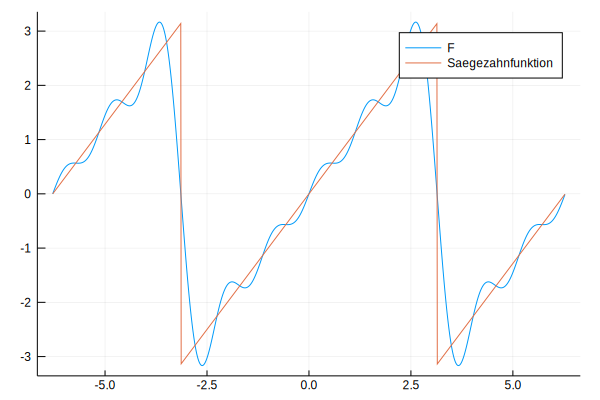

In [43]:
F(t) = 2*sin(t)-sin(2*t)+2/3*sin(3*t)-1/2*sin(4*t)+2/5*sin(5*t); # Ersetzt 'NaN' durch die ersten 5 Summanden der Fourierreihe der Sägezahnfunktion

# Ab hier nichts mehr ändern
MP3.AB2Zusatzaufgabe(F)